<h1>(Practice) Shap with the Titanic</h1>
    

<p></p>
<ul><li>For this assignment you will be fitting a machine learning model to predict survivors of the titanic.<ul><li>This assignment is focused on working with Shap, so we have provided the code up through the modeling process.</li></ul></li><li>After fitting the model, use Shap to create:<ul><li>A summary plot for passengers that Survived.</li><li>In a markdown cell below, interpret the top 5 most important features (according to shap).<ul><li>Do these results make sense based on what you know about the Titanic?</li></ul></li></ul></li></ul>
<h3>the Data<a href="http://localhost:8888/notebooks/ASSIGNMENTS/03_Practice_Shap_Titanic.ipynb#the-Data" class="anchor-link" target="_blank"></a></h3>
<ul><li><a href="https://drive.google.com/file/d/1zP14pOhU5dd1pNc6JnhF-XJOzuUmtGxI/view" rel="nofollow" target="_blank">Share URL</a></li><li>Original Source &amp; Data Dictionary: <a href="https://www.kaggle.com/competitions/titanic/data" rel="nofollow" target="_blank">https://www.kaggle.com/competitions/titanic/data</a></li><li>Direct URL: '<a href="https://docs.google.com/spreadsheets/d/e/2PACX-1vR9Yhcch85ziIad4CyZQqLtYijHgsuENLfyC0YAXlajVbSC7U7s3CUUsfG-OYIKOjTI9DdKZH1xMs3a/pub?output=csv%27" rel="nofollow" target="_blank">https://docs.google.com/spreadsheets/d/e/2PACX-1vR9Yhcch85ziIad4CyZQqLtYijHgsuENLfyC0YAXlajVbSC7U7s3CUUsfG-OYIKOjTI9DdKZH1xMs3a/pub?output=csv'</a></li></ul>
<p><br></p>
<h2>Starter Code</h2>
<p></p>
<pre data-language="python"><span class="comment">## Our standard imports</span>
<span class="keyword">import</span> pandas <span class="keyword">as</span> pd
<span class="keyword">import</span> numpy <span class="keyword">as</span> np
<span class="keyword">import</span> matplotlib.pyplot <span class="keyword">as</span> plt
<span class="keyword">import</span> seaborn <span class="keyword">as</span> sns
<span class="comment">## Preprocessing tools</span>
<span class="keyword">from</span> sklearn.model_selection <span class="keyword">import</span> train_test_split
<span class="keyword">from</span> sklearn.compose <span class="keyword">import</span> make_column_transformer, make_column_selector
<span class="keyword">from</span> sklearn.pipeline <span class="keyword">import</span> make_pipeline
<span class="keyword">from</span> sklearn.preprocessing <span class="keyword">import</span> OneHotEncoder, StandardScaler
<span class="keyword">from</span> sklearn.impute <span class="keyword">import</span> SimpleImputer
<span class="comment">## Models &amp; evaluation metrics</span>
<span class="keyword">from</span> sklearn <span class="keyword">import</span> metrics
<span class="keyword">from</span> sklearn.ensemble <span class="keyword">import</span> RandomForestRegressor
<span class="comment">## setting random state for reproducibility</span>
SEED <span class="keyword operator">=</span> <span class="constant numeric">321</span>
np.random.<span class="function call">seed</span>(SEED)
<button class="copy_code_snippet_btn">copy</button></pre>
<p></p>
<pre data-language="python">fname <span class="keyword operator">=</span> <span class="string">'https://docs.google.com/spreadsheets/d/e/2PACX-1vR9Yhcch85ziIad4CyZQqLtYijHgsuENLfyC0YAXlajVbSC7U7s3CUUsfG-OYIKOjTI9DdKZH1xMs3a/pub?output=csv'</span>
<span class="comment"># df.to_csv(fname,compression='gzip',index=False)</span>
df<span class="keyword operator">=</span> pd.<span class="function call">read_csv</span>(fname,index_col<span class="keyword operator">=</span><span class="constant numeric">0</span>)
df
<button class="copy_code_snippet_btn">copy</button></pre>
<p></p>
<p><br></p>
<pre data-language="python"><span class="comment"># ### Train Test Split</span>
<span class="comment">## Make x and y variables</span>
drop_feats ass<span class="keyword operator">=</span><span class="string">"keyword operator from-rainbow"</span><span class="keyword operator">&gt;</span><span class="keyword operator">=</span> [<span class="string">"Name"</span>,<span class="string">"Ticket"</span>,<span class="string">"Cabin"</span>]
y ass<span class="keyword operator">=</span><span class="string">"keyword operator from-rainbow"</span><span class="keyword operator">&gt;</span><span class="keyword operator">=</span> df[<span class="string">'Survived'</span>].<span class="function call">copy</span>()
X <span class="keyword operator">=</span> df.<span class="function call">drop</span>(columns<span class="keyword operator">=</span>[<span class="string">'Survived'</span>,<span class="keyword operator">*</span>drop_feats]).<span class="function call">copy</span>()
<span class="comment">## train-test-split with random state for reproducibility</span>
X_train, X_test, y_train, y_test <span class="keyword operator">=</span> <span class="function call">train_test_split</span>(X,y, random_state<span class="keyword operator">=</span>SEED)
<span class="comment"># ### Preprocessing + ColumnTransformer</span>
<span class="comment">## make categorical &amp; numeric selectors</span>
cat_sel <span class="keyword operator">=</span> <span class="function call">make_column_selector</span>(dtype_include<span class="keyword operator">=</span><span class="string">'object'</span>)
num_sel <span class="keyword operator">=</span> <span class="function call">make_column_selector</span>(dtype_include<span class="keyword operator">=</span><span class="string">'number'</span>)
<span class="comment">## make pipelines for categorical vs numeric data</span>
cat_pipe <span class="keyword operator">=</span> <span class="function call">make_pipeline</span>(<span class="function call">SimpleImputer</span>(strategy<span class="keyword operator">=</span><span class="string">'constant'</span>,
                                       fill_value<span class="keyword operator">=</span><span class="string">'MISSING'</span>),
                         <span class="function call">OneHotEncoder</span>(drop<span class="keyword operator">=</span><span class="string">'if_binary'</span>, sparse<span class="keyword operator">=</span><span class="constant language">False</span>))
num_pipe <span class="keyword operator">=</span> <span class="function call">make_pipeline</span>(<span class="function call">SimpleImputer</span>(strategy<span class="keyword operator">=</span><span class="string">'mean'</span>))
<span class="comment">## make the preprocessing column transformer</span>
preprocessor <span class="keyword operator">=</span> <span class="function call">make_column_transformer</span>((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out<span class="keyword operator">=</span><span class="constant language">False</span>)
<span class="comment">## fit column transformer and run get_feature_names_out</span>
preprocessor.<span class="function call">fit</span>(X_train)
feature_names <span class="keyword operator">=</span> preprocessor.<span class="function call">get_feature_names_out</span>()
X_train_df <span class="keyword operator">=</span> pd.<span class="function call">DataFrame</span>(preprocessor.<span class="function call">transform</span>(X_train), 
                          columns <span class="keyword operator">=</span> feature_names, index <span class="keyword operator">=</span> X_train.index)
X_test_df <span class="keyword operator">=</span> pd.<span class="function call">DataFrame</span>(preprocessor.<span class="function call">transform</span>(X_test), 
                          columns <span class="keyword operator">=</span> feature_names, index <span class="keyword operator">=</span> X_test.index)
X_test_df.<span class="function call">head</span>(<span class="constant numeric">3</span>)
<button class="copy_code_snippet_btn">copy</button></pre>
<p></p><pre data-language="python"><span class="comment">## fit random forest</span>
<span class="keyword">from</span> sklearn.ensemble <span class="keyword">import</span> RandomForestClassifier
rf_clf <span class="keyword operator">=</span> <span class="function call">RandomForestClassifier</span>()
rf_clf.<span class="function call">fit</span>(X_train_df,y_train)
<button class="copy_code_snippet_btn">copy</button></pre>
<p>- Next, evaluate your model's performance on the training and test data and then apply Shap!</p>
</div>

## Starter Code

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)



In [2]:
fname = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR9Yhcch85ziIad4CyZQqLtYijHgsuENLfyC0YAXlajVbSC7U7s3CUUsfG-OYIKOjTI9DdKZH1xMs3a/pub?output=csv'
# df.to_csv(fname,compression='gzip',index=False)
df= pd.read_csv(fname,index_col=0)
df



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
fname = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR9Yhcch85ziIad4CyZQqLtYijHgsuENLfyC0YAXlajVbSC7U7s3CUUsfG-OYIKOjTI9DdKZH1xMs3a/pub?output=csv'
# df.to_csv(fname,compression='gzip',index=False)
df= pd.read_csv(fname,index_col=0)
df



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
# ### Train Test Split
## Make x and y variables
drop_feats = ["Name","Ticket","Cabin"]
y = df['Survived'].copy()
X = df.drop(columns=['Survived',*drop_feats]).copy()
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
# ### Preprocessing + ColumnTransformer
## make categorical & numeric selectors
cat_sel = make_column_selector(dtype_include='object')
num_sel = make_column_selector(dtype_include='number')
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_df.head(3)



,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_MISSING,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
355,3.0,30.314472,0.0,0.0,7.225,1.0,1.0,0.0,0.0,0.0
519,2.0,36.000000,1.0,0.0,26.000,0.0,0.0,0.0,0.0,1.0
814,3.0,6.000000,4.0,2.0,31.275,0.0,0.0,0.0,0.0,1.0


In [5]:
## fit random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_df,y_train)

RandomForestClassifier()

# SOLUTION

In [6]:
rf_clf.score(X_test_df, y_test)

0.852017937219731

## After fitting the model, use Shap to create:

In [7]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [8]:
X_shap = shap.sample(X_test_df,nsamples=400,random_state=321)
X_shap

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_MISSING,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
355,3.0,30.314472,0.0,0.0,7.2250,1.0,1.0,0.0,0.0,0.0
519,2.0,36.000000,1.0,0.0,26.0000,0.0,0.0,0.0,0.0,1.0
814,3.0,6.000000,4.0,2.0,31.2750,0.0,0.0,0.0,0.0,1.0
387,3.0,1.000000,5.0,2.0,46.9000,1.0,0.0,0.0,0.0,1.0
490,3.0,9.000000,1.0,1.0,15.9000,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
599,3.0,30.314472,0.0,0.0,7.2250,1.0,1.0,0.0,0.0,0.0
740,3.0,30.314472,0.0,0.0,7.8958,1.0,0.0,0.0,0.0,1.0
253,1.0,62.000000,0.0,0.0,26.5500,1.0,0.0,0.0,0.0,1.0


In [9]:
## get the corresponding y-values
y_shap = y_test.loc[X_shap.index]
y_shap 

PassengerId
355    0
519    1
814    0
387    0
490    1
      ..
599    0
740    0
253    0
382    1
536    1
Name: Survived, Length: 223, dtype: int64

In [10]:
explainer = shap.Explainer(rf_clf)
explainer

In [11]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(223, 10, 2)

In [12]:
shap_vals_Survived = shap_values[:,:,1]
shap_vals_Survived

.values =
array([[-6.48214787e-02, -2.87718433e-02, -5.04599959e-03, ...,
        -1.09694400e-05,  3.81061470e-03,  2.47087616e-02],
       [ 8.49028861e-02,  2.79680110e-02, -8.97565751e-03, ...,
        -1.18998865e-05, -1.79033574e-03, -5.34399162e-03],
       [-1.02291032e-01,  2.43193167e-01, -6.37432004e-02, ...,
        -9.85161736e-06,  2.63510791e-03, -3.91682648e-03],
       ...,
       [ 9.92344664e-02, -2.32009315e-01, -1.31186340e-02, ...,
        -2.97743746e-04,  1.02633409e-03, -5.60518956e-03],
       [-5.87297192e-02,  1.54042868e-01,  3.21232236e-02, ...,
        -7.89859050e-06,  8.87358685e-03, -6.09915696e-03],
       [ 7.83155585e-02,  1.36864389e-01,  2.66337051e-02, ...,
        -1.16258818e-05,  3.72834648e-03, -1.80757682e-03]])

.base_values =
array([0.37199102, 0.37199102, 0.37199102, 0.37199102, 0.37199102,
       0.37199102, 0.37199102, 0.37199102, 0.37199102, 0.37199102,
       0.37199102, 0.37199102, 0.37199102, 0.37199102, 0.37199102,
       0.3719910

### A summary plot for passengers that Survived.

- In a markdown cell below, interpret the top 5 most important features (according to shap).
- Do these results make sense based on what you know about the Titanic?

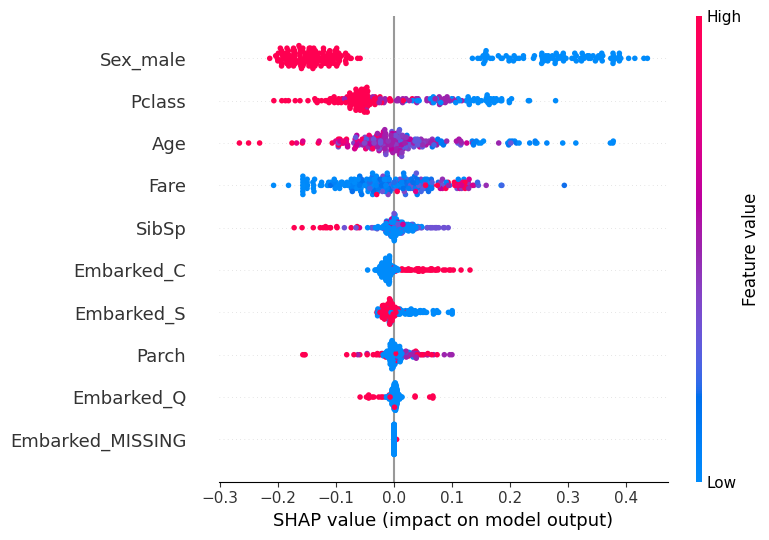

In [13]:
shap.summary_plot(shap_vals_Survived,X_shap)

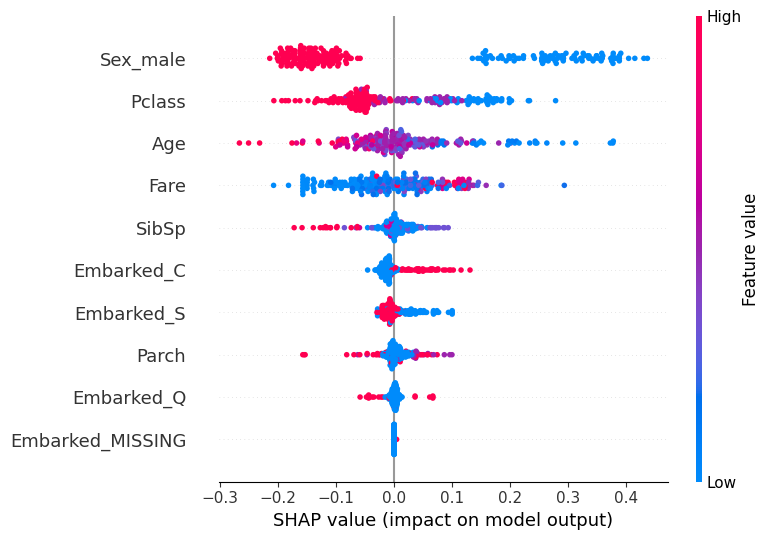

In [15]:
fig, ax = plt.subplots()
shap.summary_plot(shap_vals_Survived,X_shap)
ax.set_title('Summary Plot - Class=Survived');
fig.savefig('images/summary_plot_titanic.png')

- Shap Summary Plot Interpretation:
    -  Sex_male:
        -  Being male decreased the likelihood of being predicted to be a Survivor
    - Fare:
        - The higher the fare, the more likely the model will predict they will Survive.
    - Pclass:
        - The better the passenger class (lower is better) the more likely the model will predict they will Survive.
    - Age:
        - The older the passenger, the more likely the model will predict them to die.
   
    - SibSp:
        - The more family members, the less likely the model will predict them to Survive.


- These make intuitive sense due to "Women and children first", as well as first class passengers being prioritized.